## DATA 201: Week 4 Weather Statistics

### Imports

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import tabulate

### Read in the Data and Convert to np array

In [2]:
with open(os.path.join("..", "data", "headers.csv")) as file:
    headers = file.readline().strip().split(',')

# date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed

date_time = []
temperature = []
heat_index = []
humidity = []
barometric_pressure = []
wind_speed = []

with open(os.path.join("..", "data", "weather_09_01-08.csv")) as file:
    reader = csv.reader(file)
    for line in reader:
        date_time.append(line[0])
        temperature.append(line[1])
        heat_index.append(line[2])
        humidity.append(line[3])
        barometric_pressure.append(line[4])
        wind_speed.append(line[5])
        
date_time = np.array(date_time, dtype=np.datetime64)
temperature = np.array(temperature, dtype=np.float64)
heat_index = np.array(heat_index, dtype=np.float64)
humidity = np.array(humidity, dtype=np.float64)
barometric_pressure = np.array(barometric_pressure, dtype=np.float64)
wind_speed = np.array(wind_speed, dtype=np.float64)

data = np.array([date_time, temperature, heat_index, humidity, barometric_pressure, wind_speed])
variable_label = ["Date/Time", "Temperature", "Heat Index", "Humidity", "Barometric Pressure", "Wind Speed"]
units = ["yy-mm-dd", "Deg. F", "Deg. F", "%", "in", "mph"]

print(f"Headers: {headers}")
fig_x = 12
fig_y = 5

Headers: ['date_time', 'temperature', 'heat_index', 'humidity', 'barometric_pressure', 'wind_speed']


In [3]:
def histograms(data, bool_range=np.ones(data[0].size, dtype=bool)):

    for m in range(1, len(data)):
        variable = data[m][bool_range]
        fig = plt.figure(figsize=(fig_x, fig_y))
        plt.title(f"{variable_label[m]}")
        plt.xlabel(f"{variable_label[m]} [{units[m]}]")
        plt.ylabel(f"Count")
        plt.hist(variable, bins='auto')
        plt.show()


## Histogram of a Temperature for September 6th

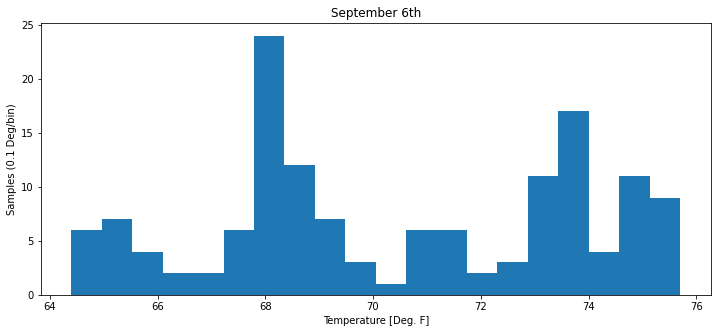

In [4]:
sept6 = np.datetime64('2019-09-06T00:01')
sept7 = np.datetime64('2019-09-07T00:01')
sept6_bool = (date_time > sept6) & (date_time < sept7)


plt.figure(figsize=(fig_x, fig_y))
plt.title("September 6th")
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.hist(temperature[sept6_bool], bins=20)
plt.show()



### Descriptive Statistics for each Day

In [5]:
print(f"Temp Mean for Sept 6th:\t{temperature[sept6_bool].mean()} [deg F]")
print(f"Temp Standard Dev for Sept 6th:\t{temperature[sept6_bool].std()} [deg F]")

Temp Mean for Sept 6th:	70.44545454545455 [deg F]
Temp Standard Dev for Sept 6th:	3.3120404897850877 [deg F]


In [6]:
each_day = []
temperature_means = []
temperature_stdev = []
temperature_dates = []

# Generate Temperature Means, Standard Dev, and Dates

for i in range(1, 8):
    time_min = np.datetime64(f'2019-09-{i:02d}T00:01')
    time_max = np.datetime64(f'2019-09-{i+1:02d}T00:01')
    bool_for_one_day = (date_time > time_min) & (date_time < time_max)

    temperature_means.append(temperature[bool_for_one_day].mean())
    temperature_stdev.append(temperature[bool_for_one_day].std())
    temperature_dates.append(time_min)
    each_day.append(bool_for_one_day)

### Mean w/standard deviation for the y error bars by day of week

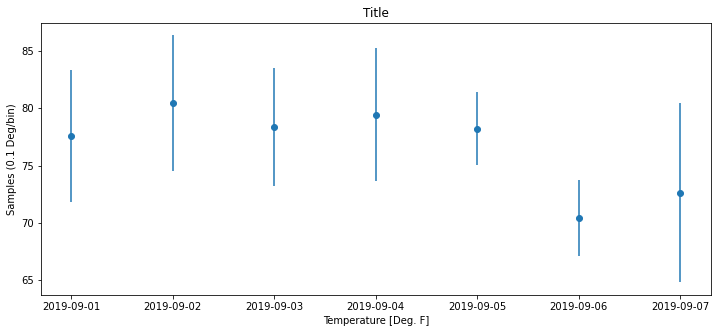

In [7]:
plt.figure(figsize=(fig_x, fig_y))
plt.title("Title")
plt.xlabel("Temperature [Deg. F]")
plt.ylabel("Samples (0.1 Deg/bin)")
plt.errorbar(temperature_dates, temperature_means, yerr=temperature_stdev, fmt="o")
plt.show()


### High and Low Temperatures for the Week

In [8]:
k = 0
for day in each_day:
    print(f"Date:\t{temperature_dates[k]}")
    print(f"High:\t{np.max(temperature[day])} deg. F")
    print(f"Low:\t{np.min(temperature[day])} deg. F")
    print("\n")
    k += 1

Date:	2019-09-01T00:01
High:	87.0 deg. F
Low:	69.9 deg. F


Date:	2019-09-02T00:01
High:	90.9 deg. F
Low:	73.7 deg. F


Date:	2019-09-03T00:01
High:	89.9 deg. F
Low:	72.6 deg. F


Date:	2019-09-04T00:01
High:	89.7 deg. F
Low:	72.0 deg. F


Date:	2019-09-05T00:01
High:	85.4 deg. F
Low:	75.1 deg. F


Date:	2019-09-06T00:01
High:	75.7 deg. F
Low:	64.4 deg. F


Date:	2019-09-07T00:01
High:	84.8 deg. F
Low:	62.2 deg. F




### Histogram for All Variable for the entire week:

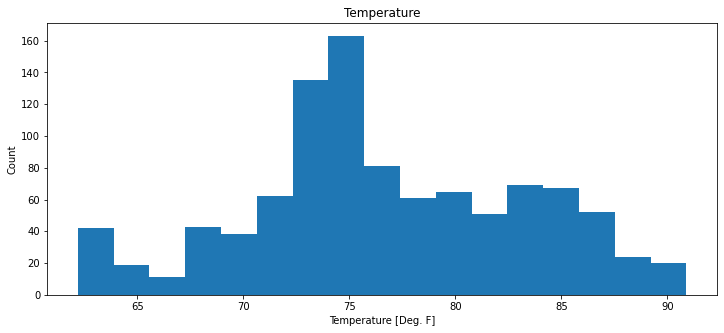

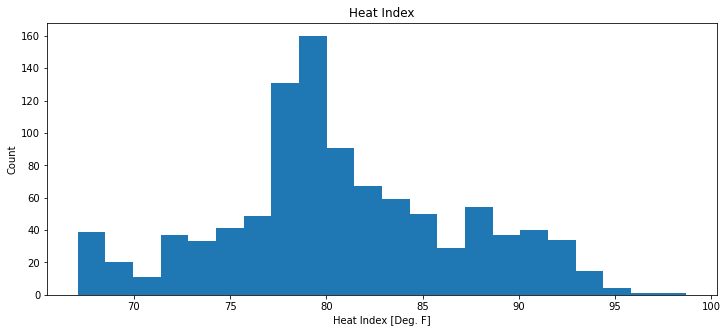

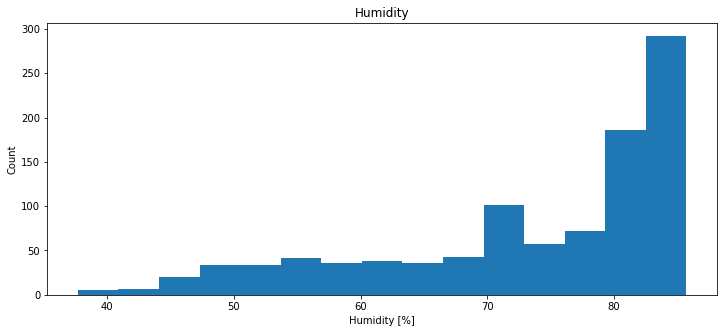

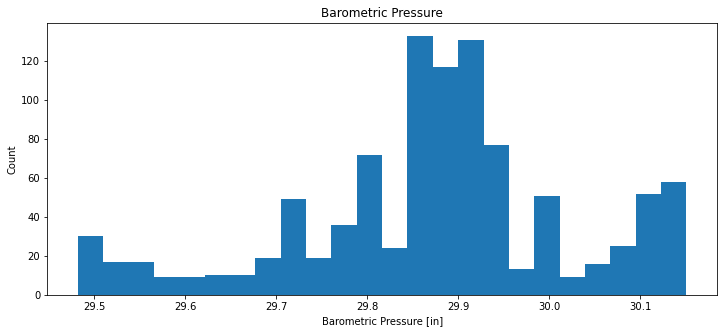

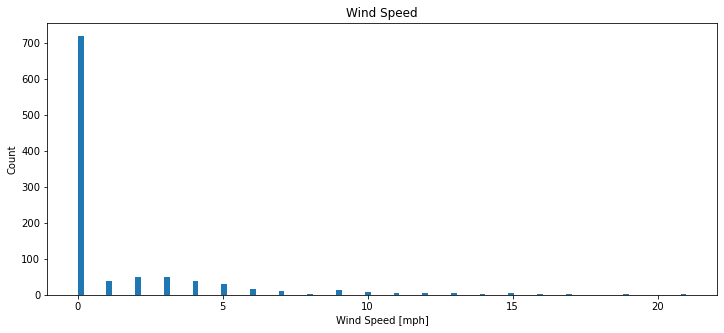

In [9]:
histograms(data)

### Histogram for All Variable for Sept 6th:

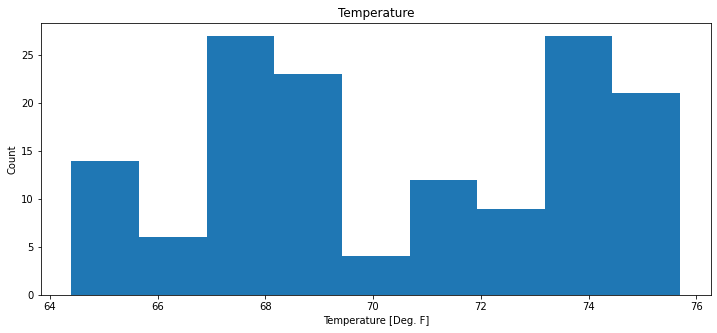

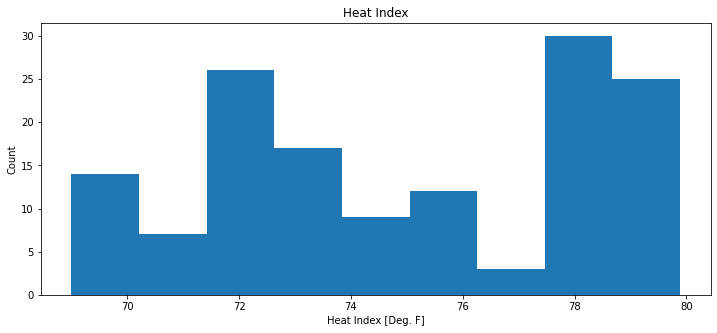

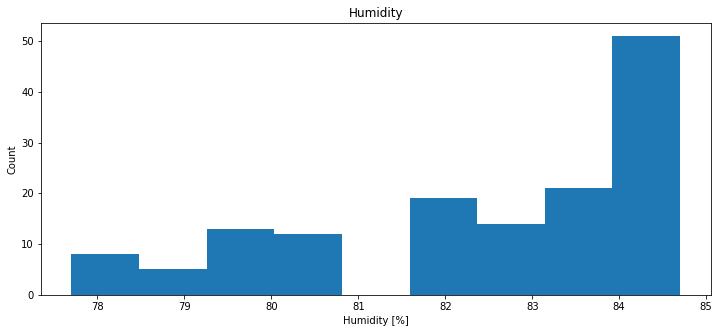

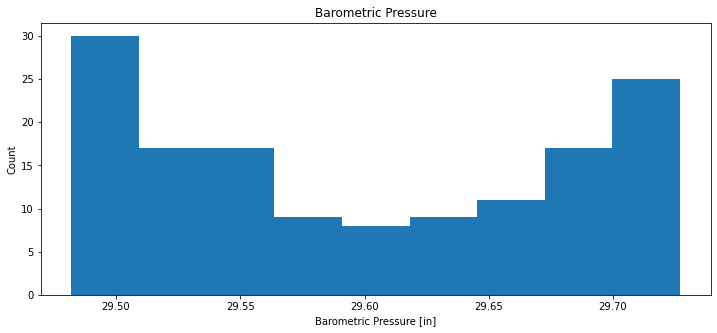

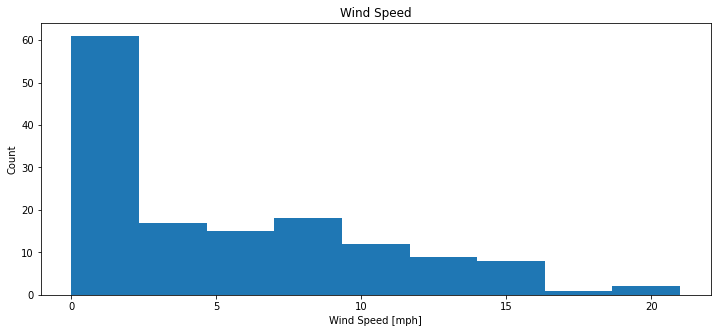

In [10]:
histograms(data, sept6_bool)